# Data Wrangling
Importing Data

[Data Overlook with Pandas Profiling](#Data-Overlook-with-Pandas-Profiling)

- Observations
- Confidence Cut-offs
- Drop Unfinished Cases
- Missing Data 

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_raw = pd.read_csv(r'/Users/michelstahli/Spring 2022 (Bootcamp+)/Jupyter Notebook CSVs/a697592.csv')

In [3]:
df_raw.shape

(10072, 44)

Get rid of columns we clearly don't need

In [4]:
df_new = df_raw[['_unit_id', '_unit_state','_trusted_judgments','bigotry', 'bigotry:confidence', 'directed','directed:confidence', 'sentiment_comment', 'sentiment_comment:confidence', 'sentiment_topic', 'sentiment_topic:confidence', 'author_name', 'body', 'id', 'overall_sentiment_score','subreddit','subreddit_id','ups']]

In [5]:
df_new.head()

,_unit_id,_unit_state,_trusted_judgments,bigotry,bigotry:confidence,directed,directed:confidence,sentiment_comment,sentiment_comment:confidence,sentiment_topic,sentiment_topic:confidence,author_name,body,id,overall_sentiment_score,subreddit,subreddit_id,ups
0,684790497,finalized,3,False,0.6585,Directed,1.0000,neutral,1.0000,neutral,1.0000,UFOabductee,Is this where I'm supposed to start a Linux fl...,t1_c15vcg9,-1.396659,announcements,t5_2r0ij,132
1,684790498,finalized,3,False,1.0000,Directed,1.0000,neutral,1.0000,neutral,1.0000,RaiseYourGlass,"Yeah man, back then OS's didn't need viruses t...",t1_c15wddg,0.688598,announcements,t5_2r0ij,13
2,684790499,finalized,3,False,1.0000,Directed,0.6492,neutral,0.6492,neutral,1.0000,raldi,"&gt; I just extended for a year, verified, and...",t1_c16z039,-0.413420,announcements,t5_2r0ij,8
3,684790500,finalized,3,False,1.0000,Directed,0.6578,neutral,0.3602,neutral,0.7024,TheCid,The hell? That many people getting r/lounge ac...,t1_c16zi8e,-0.880108,announcements,t5_2r0ij,2
4,684790501,finalized,3,False,1.0000,Directed,1.0000,positive,1.0000,positive,1.0000,eunos,Worked perfectly! I'm glad to have given back ...,t1_c17051h,3.160947,announcements,t5_2r0ij,2


In [6]:
#bigoted values
y = (df_new['bigotry'] == True).values.astype(int)
y.sum()

925

In [7]:
df_new.to_csv(r'/Users/michelstahli/Spring 2022 (Bootcamp+)/Jupyter Notebook CSVs/CS2_Core_Data.csv')

In [8]:
df_new = pd.read_csv(r'/Users/michelstahli/Spring 2022 (Bootcamp+)/Jupyter Notebook CSVs/CS2_Core_Data.csv')

In [9]:
df_new['_trusted_judgments'].unique()

array([3, 4, 5, 2])

### Data Overlook with Pandas Profiling

In [10]:
#from pandas_profiling import ProfileReport

In [11]:
#Use ProfileReport to get a sense of data. Output not shown. 
#profile = ProfileReport(df_new, title='Data Prof Report', minimal=True)
#profile.to_widgets()

Observations: 

unit_id is for each individual comment (since 100% distinct)
unit_state has 11 observations "in progress"

trusted_judgment has 2 (11), 3 (9568), 4 (457), and 5 (36). =>Will drop 2 only, and take a closer look at 5.

bigotry has 9147 (90.8%) False, 925 (9.2%) True. Low bigotry overall. 
bigotry:confidence 7725 observations with 1. There are 880 distinct values... - should be 60 only.
=> decide on > _.67 - 8821 observations. Crowd Flower in built function. 

directed has 7629 Directed and 2443 Non_Directed  
directed:confidence 4502 observations with 1. _>.67 has 8821 observations.

For sentiment_comment there is 24.3% missing data, yet for sentiment_comment:confidence there is only 4.7%, but 19.5% Zeros. neutral, positive, negative - 3253, 2404, 1972
=> Will create multiple df with and without missing data from sentiment. 
sentiment_comment:confidence _>.67 3691 observations.

sentiment_topic is neutral, negative, positive - 4558, 2782, 2732
sentiment_topic:confidence _>.67 6689 observations. 

author_name has 9211 (91.5%) distinct values - some 850 authors have multiple comments in the dataset. 

overall_sentiment has median of -0.259642353, max 4, min -3.99 . Unsure how this was evaluated.  

101 subreddits 

ups has median 3, mean 20.245, min -72, max 3528. Stdev 121. Q3 - 9, Q1 - 1. 

In [12]:
#Check difference between .67 and .66 confidence for observations. 
print(df_new[df_new['bigotry:confidence'] == 1].shape)
print(df_new[df_new['bigotry:confidence'] == 1].shape)
print('\n')
print(df_new[df_new['directed:confidence']== 1].shape)
print(df_new[df_new['directed:confidence'] > .66].shape)
print('\n')
print(df_new[df_new['sentiment_topic:confidence'] > .67].shape)
print(df_new[df_new['sentiment_topic:confidence'] > .66].shape)

(7725, 19)
(7725, 19)


(4502, 19)
(7937, 19)


(6689, 19)
(7512, 19)


<AxesSubplot:>

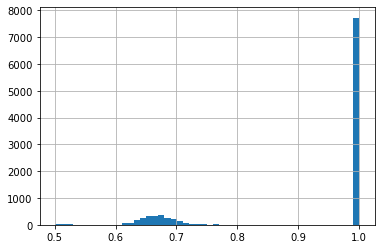

In [13]:
df_new['bigotry:confidence'].hist(bins=50)

<AxesSubplot:>

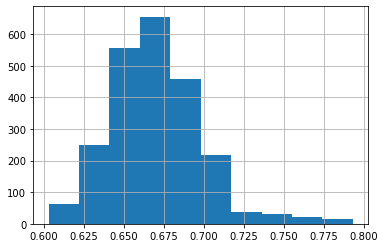

In [14]:
#Bigotry
df_erika_ist= df_new[(df_new['bigotry:confidence']>=0.6) & (df_new['bigotry:confidence']<=0.8)]
df_erika_ist['bigotry:confidence'].hist()

In [15]:
#Drop "in progress" - 
df_new = df_new[df_new['_unit_state'] == 'finalized']
df_new.drop(columns = ['_unit_state'], inplace = True)

#Let's rename the columns 
df_named = df_new.rename(columns = {'_unit_id':'num_id', '_trusted_judgments':'reviewers', 'bigotry:confidence':'bigotry_c', 'directed:confidence':'directed_c', 'sentiment_comment:confidence':'sentcom_c', 'sentiment_topic:confidence':'senttop_c', 'body':'text'}, inplace = False)

#And get rid of the number column
df_named = df_named.iloc[: , 1:]
df_named.head()

,num_id,reviewers,bigotry,bigotry_c,directed,directed_c,sentiment_comment,sentcom_c,sentiment_topic,senttop_c,author_name,text,id,overall_sentiment_score,subreddit,subreddit_id,ups
0,684790497,3,False,0.6585,Directed,1.0000,neutral,1.0000,neutral,1.0000,UFOabductee,Is this where I'm supposed to start a Linux fl...,t1_c15vcg9,-1.396659,announcements,t5_2r0ij,132
1,684790498,3,False,1.0000,Directed,1.0000,neutral,1.0000,neutral,1.0000,RaiseYourGlass,"Yeah man, back then OS's didn't need viruses t...",t1_c15wddg,0.688598,announcements,t5_2r0ij,13
2,684790499,3,False,1.0000,Directed,0.6492,neutral,0.6492,neutral,1.0000,raldi,"&gt; I just extended for a year, verified, and...",t1_c16z039,-0.413420,announcements,t5_2r0ij,8
3,684790500,3,False,1.0000,Directed,0.6578,neutral,0.3602,neutral,0.7024,TheCid,The hell? That many people getting r/lounge ac...,t1_c16zi8e,-0.880108,announcements,t5_2r0ij,2
4,684790501,3,False,1.0000,Directed,1.0000,positive,1.0000,positive,1.0000,eunos,Worked perfectly! I'm glad to have given back ...,t1_c17051h,3.160947,announcements,t5_2r0ij,2


**This also gets rid of all columns with less than 3 reviewers**

In [16]:
df_named['reviewers'].unique()

array([3, 4, 5])

#### Confirm the only missing data we need to deal with is sentiment_comment and sentcom_c 

In [17]:
#Confirm missing data 
print(df_named.isna().sum())
print('\n')

#Confirm duplicate rows = zero
print(df_named[df_named.duplicated()])

num_id                        0
reviewers                     0
bigotry                       0
bigotry_c                     0
directed                      0
directed_c                    0
sentiment_comment          2439
sentcom_c                   471
sentiment_topic               0
senttop_c                     0
author_name                   0
text                          0
id                            0
overall_sentiment_score       0
subreddit                     0
subreddit_id                  0
ups                           0
dtype: int64


Empty DataFrame
Columns: [num_id, reviewers, bigotry, bigotry_c, directed, directed_c, sentiment_comment, sentcom_c, sentiment_topic, senttop_c, author_name, text, id, overall_sentiment_score, subreddit, subreddit_id, ups]
Index: []


In [18]:
#Create df with directed as bool as well 

b = {'Directed': True, 'Non_Directed': False}
df_booled = df_named
df_booled['directed'] = df_named['directed'].map(b)


In [19]:
df_named.to_csv(r'/Users/michelstahli/Spring 2022 (Bootcamp+)/Jupyter Notebook CSVs/rbig_wrangled.csv')
df_booled.to_csv(r'/Users/michelstahli/Spring 2022 (Bootcamp+)/Jupyter Notebook CSVs/rbig_booled.csv')

In [20]:
df_booled.head()

,num_id,reviewers,bigotry,bigotry_c,directed,directed_c,sentiment_comment,sentcom_c,sentiment_topic,senttop_c,author_name,text,id,overall_sentiment_score,subreddit,subreddit_id,ups
0,684790497,3,False,0.6585,True,1.0000,neutral,1.0000,neutral,1.0000,UFOabductee,Is this where I'm supposed to start a Linux fl...,t1_c15vcg9,-1.396659,announcements,t5_2r0ij,132
1,684790498,3,False,1.0000,True,1.0000,neutral,1.0000,neutral,1.0000,RaiseYourGlass,"Yeah man, back then OS's didn't need viruses t...",t1_c15wddg,0.688598,announcements,t5_2r0ij,13
2,684790499,3,False,1.0000,True,0.6492,neutral,0.6492,neutral,1.0000,raldi,"&gt; I just extended for a year, verified, and...",t1_c16z039,-0.413420,announcements,t5_2r0ij,8
3,684790500,3,False,1.0000,True,0.6578,neutral,0.3602,neutral,0.7024,TheCid,The hell? That many people getting r/lounge ac...,t1_c16zi8e,-0.880108,announcements,t5_2r0ij,2
4,684790501,3,False,1.0000,True,1.0000,positive,1.0000,positive,1.0000,eunos,Worked perfectly! I'm glad to have given back ...,t1_c17051h,3.160947,announcements,t5_2r0ij,2


Main takeaways: 

Note the sentiment_comment missing data/sentcon_c.  

Need to check correlations between sentiments directed and bigotry. 

See "CSV's etc." for latest clean csv 

Just use confidence = 1, since so many observations. (See plot)

Note: See if bigotry , negative sentiment +  directed (check to see this) or both are truly toxic -- 

May need to filter for sentiment_topic 

In [21]:
y = (df_booled['bigotry'] == True).values.astype(int)
y.sum()

921